In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation

from PIL import Image
import cv2 as cv
import glob
import os
from tqdm import tqdm_notebook

In [19]:
scene_dir = "scenes/scene_001/images/img_*"
scene_name = "multi_shape_dense_texture"
images = glob.glob(scene_dir)
images.sort()

# Extract frame differencing

In [20]:
diffs = []
for i in range(1, len(images)):
    img_b = cv.imread(images[i])
    img_a = cv.imread(images[i-1])
    diff = img_b - img_a

    diffs.append(diff)

<IPython.core.display.Javascript object>


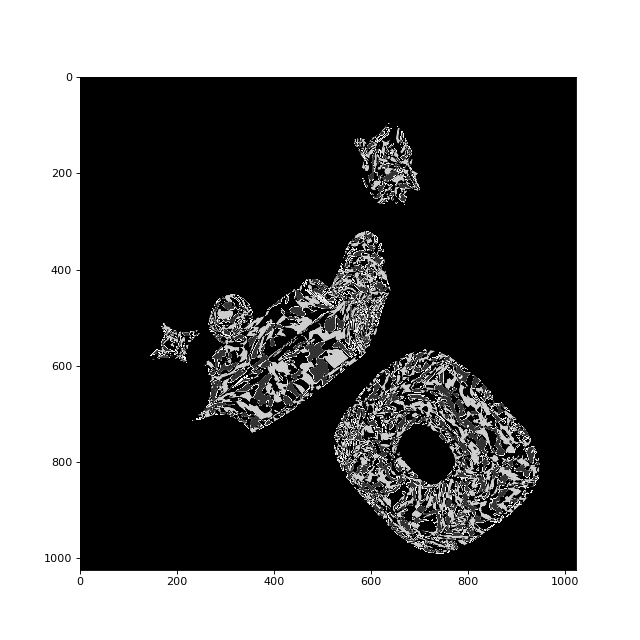

.....Done!


In [21]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
%matplotlib notebook
import matplotlib.animation as animation

fps = 20
nSeconds = int(len(diffs) / fps)
snapshots = diffs

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('media/frame_differencing/%s.mp4' % scene_name, fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')

# plt.show()  # Not required, it s

# Extract Optical Flow

In [47]:
cap = cv.VideoCapture("movies/scene_000_tex.mp4")
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
while(1):
    ret, frame2 = cap.read()
    next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
    cv.imshow('frame2',bgr)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv.imwrite('opticalfb.png',frame2)
        cv.imwrite('opticalhsv.png',bgr)
    prvs = next

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
